In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [5]:
df_ori = pd.read_csv('data/gdf_final.csv').dropna()
X_col = [
    'dist',
    'delta_time',
    'trip_hour',
    'avgtemp',
    '16_earnings',
    'median_earnings',
    'median_age'
]
y_col = ['usage_counts']
classes = ['low', 'mid', 'high']
X = StandardScaler().fit_transform(df_ori[X_col])


In [6]:
from sklearn.ensemble import GradientBoostingRegressor
y = df_ori[y_col].to_numpy().flatten()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
regr = GradientBoostingRegressor(criterion='squared_error',
                                 n_estimators=100, 
                                 max_features='sqrt', 
                                 max_depth=10, 
                                 random_state=0)
regr.fit(X_train, y_train)
regr.score(X_train, y_train), regr.score(X_test, y_test)


(0.7582364449374186, 0.6691779638406311)

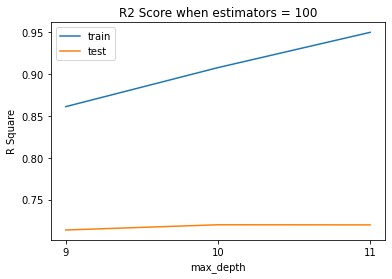

In [13]:
n = 3
n_estimators = 500
depthList = [i+9 for i in range(n)]
train_score_list = np.zeros(n)
test_score_list = np.zeros(n)
for idx, d in enumerate(depthList):
    regr = GradientBoostingRegressor(criterion='squared_error',
                                     n_estimators=n_estimators, 
                                     max_features='sqrt', 
                                     max_depth=d, 
                                     random_state=0)
    regr.fit(X_train, y_train)
    train_score_list[idx] = regr.score(X_train, y_train)
    test_score_list[idx] = regr.score(X_test, y_test)
plt.plot(list(range(n)), train_score_list, label='train')
plt.plot(list(range(n)), test_score_list, label='test')
plt.xticks(list(range(n)), depthList)
plt.title('R2 Score when estimators = 100')
plt.xlabel('max_depth')
plt.ylabel('R Square')
plt.legend()


### The best depth is 10

In [14]:
depth = depthList[np.argmax(test_score_list)]
regr = GradientBoostingRegressor(max_depth=10, 
                                 n_estimators=500,
                                 criterion='squared_error', 
                                 max_features='sqrt', 
                                 random_state=0)
regr.fit(X_train, y_train)
regr.score(X_train, y_train), regr.score(X_test, y_test)


(0.9075042637546361, 0.7201429279089226)